In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

#### Data Loading and Filtering

In [2]:
df = pd.read_csv("../zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [3]:
Y = df['Passed'].values
X_df = df.drop(columns=['Passed'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X_df = X_standardized.values

In [4]:
X = X_df
X = np.column_stack((
    np.ones(len(df)),
    X
))

In [5]:
# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Cost Function

In [6]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

#### Optimization

In [7]:
def compute_gradients(X, Y, y_hat):
    m = len(Y)

    """
    beta0, beta1    
    """

    beta = (1 / m) * X.T.dot(y_hat - Y)

    return beta

In [8]:
beta = np.random.randn(8)
print(f"beta values : {beta}")

lr = 0.01
n_iter = 1000

beta values : [-0.49934371 -1.20193452 -0.83632171 -0.27289163 -1.3422445  -0.24878007
 -0.22762468  0.93093826]


In [9]:
cost_history = []
for i in range(n_iter):
    """
    Z = beta.T.X = beta0 + beta1.x1
    Y_hat = sigmoid(Z)
    """
    z = X.dot(beta)
    y_hat = sigmoid(z)

    gradient = compute_gradients(X, Y, y_hat)

    beta = beta - lr * gradient

    cost = compute_cost(y_hat, Y)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration : {i}: Beta : {beta} :Cost : {cost:.4f}")

Iteration : 0: Beta : [-0.50187509 -1.20139901 -0.83514196 -0.27009083 -1.34040041 -0.24877055
 -0.22679219  0.93001323] :Cost : 0.9008
Iteration : 100: Beta : [-0.73403116 -1.14208036 -0.71726021 -0.00974617 -1.17011679 -0.24165969
 -0.15277983  0.84298828] :Cost : 0.7189
Iteration : 200: Beta : [-0.92768563 -1.07638023 -0.6042528   0.21367317 -1.02718337 -0.22691753
 -0.09616066  0.76677761] :Cost : 0.5841
Iteration : 300: Beta : [-1.08799565 -1.01094653 -0.50137698  0.40388648 -0.90948179 -0.20936779
 -0.05524903  0.70070863] :Cost : 0.4866
Iteration : 400: Beta : [-1.22070917 -0.95011845 -0.41098116  0.56552817 -0.8136885  -0.19181982
 -0.02733375  0.64412725] :Cost : 0.4172
Iteration : 500: Beta : [-1.33157328 -0.89560246 -0.33303228  0.70374419 -0.73605119 -0.17585293
 -0.00900261  0.59638694] :Cost : 0.3676
Iteration : 600: Beta : [-1.42567955 -0.84743693 -0.26621524  0.82335886 -0.67303761 -0.16215787
  0.00286493  0.55654859] :Cost : 0.3316
Iteration : 700: Beta : [-1.50712786

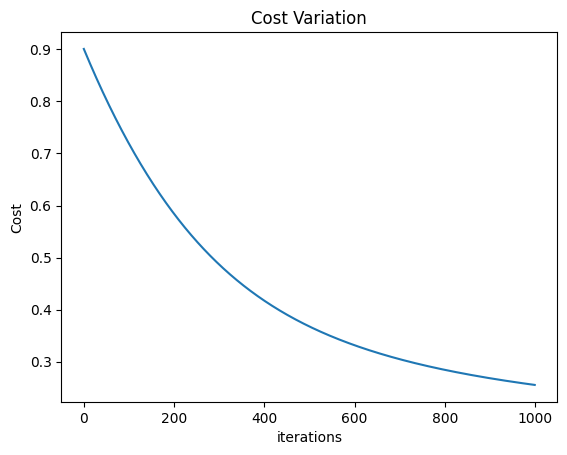

In [10]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Evaluation Matrics

In [11]:
# finding probabilty
z = X.dot(beta)
Y_proba = sigmoid(z)
Y_proba

array([0.18847569, 0.53510304, 0.10832773, 0.07168636, 0.1795927 ,
       0.8298416 , 0.08477205, 0.28957333, 0.02101599, 0.0815397 ,
       0.15677482, 0.17399144, 0.09905594, 0.03362788, 0.2547161 ,
       0.03487683, 0.89027998, 0.08062046, 0.11922527, 0.24525532,
       0.16519711, 0.06513973, 0.02612202, 0.59541605, 0.71708887,
       0.03069034, 0.11000663, 0.03717699, 0.09594667, 0.01391194,
       0.42316091, 0.06880021, 0.01150289, 0.33601136, 0.33157238,
       0.17165183, 0.01042582, 0.04580171, 0.07903321, 0.35105343,
       0.23251262, 0.24558432, 0.09342729, 0.50770623, 0.08314622,
       0.38987066, 0.19286289, 0.05582253, 0.14310103, 0.24137057,
       0.21482091, 0.03628066, 0.4562256 , 0.6272427 , 0.37552035,
       0.87900593, 0.38292534, 0.11778885, 0.15631575, 0.60587058,
       0.0800205 , 0.04703712, 0.06273261, 0.42789065, 0.08919313,
       0.06341897, 0.12566785, 0.07819053, 0.71612638, 0.03606708,
       0.01207394, 0.13988509])

In [12]:
def compute_confusion_matrix(Y,Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array([
                [TN,FP]
                ,[FN,TP]
                ],
                dtype=int
                )

In [13]:
z = X.dot(beta)
Y_hat = sigmoid(z) > 0.5
Y_hat

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False])

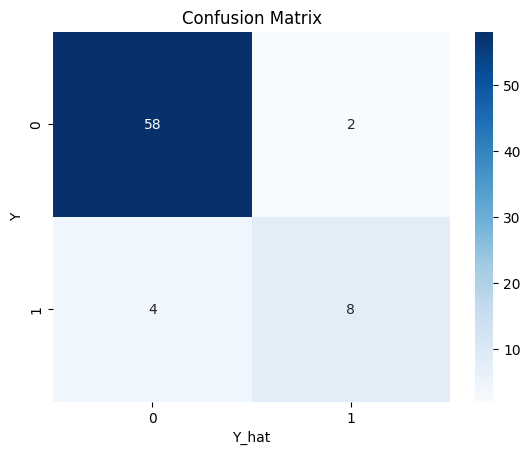

In [14]:
cm = compute_confusion_matrix(Y,Y_hat)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [15]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP/(TP+FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm)
    return 2 * p * r / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [16]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 0.8
Recall : 0.6666666666666666
F1 Score : 0.7272727272727272
Accuracy : 0.9166666666666666


In [17]:
def roc_curve(Y,Y_proba):
    thresholds = np.linspace(1,0,200)

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)



In [18]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

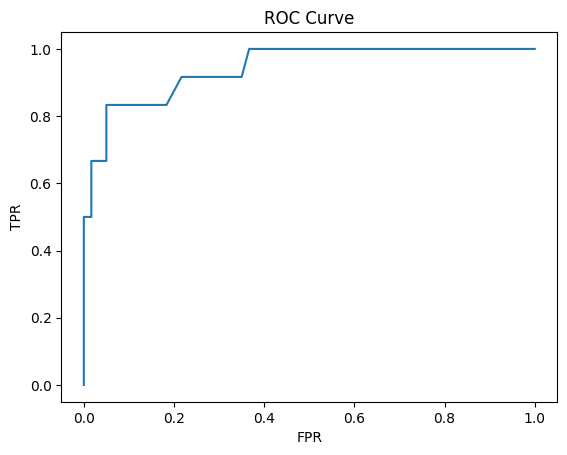

In [19]:
plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [20]:
auc = np.trapezoid(tpr, fpr)
print(f"AUC: {auc}")

AUC: 0.9423611111111111


#### Comapring with Sklearn

In [21]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X_df,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
Y_hat = logr.predict(X_df)
Y_hat

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False])

In [23]:
Y_proba = logr.predict_proba(X_df)
Y_proba = Y_proba[:,1]
Y_proba

array([1.98596641e-02, 6.56975404e-01, 2.14013276e-01, 2.44050618e-03,
       3.30172829e-01, 7.93257642e-01, 4.15161131e-03, 7.65417040e-02,
       4.32551611e-03, 9.84887230e-03, 5.54678224e-02, 2.69285704e-03,
       2.91169274e-03, 1.25025000e-02, 5.51949953e-02, 5.48224919e-04,
       9.15148026e-01, 1.02057778e-03, 1.50427168e-02, 4.86732041e-01,
       7.21326471e-02, 3.35104952e-03, 8.36318956e-04, 7.54726471e-01,
       7.63588783e-01, 2.59095015e-03, 6.27160733e-03, 2.40956504e-03,
       1.94553571e-02, 1.03257020e-03, 6.77907318e-01, 5.04386462e-03,
       4.57845545e-04, 1.34186407e-01, 1.96858264e-01, 1.63814689e-01,
       3.39639392e-04, 3.52721439e-03, 2.53438489e-03, 1.40669555e-01,
       8.23381907e-02, 1.80607296e-01, 3.84003343e-02, 3.99934649e-01,
       1.61838923e-02, 5.26070762e-02, 3.20860629e-02, 1.92020422e-03,
       5.87510027e-02, 5.83935711e-03, 2.75887796e-01, 2.75725609e-03,
       3.61271727e-02, 5.97246641e-01, 1.97885304e-01, 7.96630934e-01,
      